# Pandas Time Series Analysis Part 3: Holidays

## Inspired by Dhruv Patel's Code Basics YouTube Channel

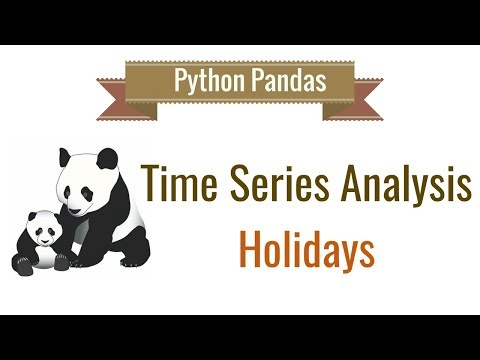

In [1]:
from IPython.display import YouTubeVideo

# Youtube
YouTubeVideo('Fo0IMzfcnQE')

In [3]:
import pandas as pd 

In [23]:
G_stock_price_df = pd.read_csv('G_Stock_Price_Without_Dates.csv')
G_stock_price_df.head() 

,Open,High,Low,Close,Adj Close,Volume
0,38.330002,38.740002,38.279999,38.709999,38.548500,900000
1,38.580002,38.700001,38.150002,38.430000,38.269672,855200
2,38.560001,38.779999,38.450001,38.720001,38.558460,338600
3,38.650002,38.650002,38.099998,38.529999,38.369251,502300
4,38.410000,38.599998,38.049999,38.220001,38.060547,1366400


In [24]:
G_stock_price_df.shape

(22, 6)

- Creating the date range from 12/31/2018 and 12/27/2019 with frequency as Business Day

In [26]:
dt_range = pd.date_range(start = '2019-07-01', end='2019-07-31', freq='B') 
dt_range

DatetimeIndex(['2019-07-01', '2019-07-02', '2019-07-03', '2019-07-04',
               '2019-07-05', '2019-07-08', '2019-07-09', '2019-07-10',
               '2019-07-11', '2019-07-12', '2019-07-15', '2019-07-16',
               '2019-07-17', '2019-07-18', '2019-07-19', '2019-07-22',
               '2019-07-23', '2019-07-24', '2019-07-25', '2019-07-26',
               '2019-07-29', '2019-07-30', '2019-07-31'],
              dtype='datetime64[ns]', freq='B')

## Note : The date rangd dt_range has length 260 which includes the US Holidays

- Creating a date range excluding the US holidays

In [27]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

In [28]:
usb = CustomBusinessDay(calendar = USFederalHolidayCalendar())
usb 

<CustomBusinessDay>

In [29]:
# Creating the date range excluding the US Federal Holidays

In [30]:
dt_range = pd.date_range(start = '2019-07-01', end='2019-07-31', freq=usb) 
dt_range

DatetimeIndex(['2019-07-01', '2019-07-02', '2019-07-03', '2019-07-05',
               '2019-07-08', '2019-07-09', '2019-07-10', '2019-07-11',
               '2019-07-12', '2019-07-15', '2019-07-16', '2019-07-17',
               '2019-07-18', '2019-07-19', '2019-07-22', '2019-07-23',
               '2019-07-24', '2019-07-25', '2019-07-26', '2019-07-29',
               '2019-07-30', '2019-07-31'],
              dtype='datetime64[ns]', freq='C')

In [31]:
# Setting the dt_range as the index
G_stock_price_df.set_index(dt_range, inplace = True) 

In [32]:
G_stock_price_df

,Open,High,Low,Close,Adj Close,Volume
2019-07-01,38.330002,38.740002,38.279999,38.709999,38.548500,900000
2019-07-02,38.580002,38.700001,38.150002,38.430000,38.269672,855200
2019-07-03,38.560001,38.779999,38.450001,38.720001,38.558460,338600
2019-07-05,38.650002,38.650002,38.099998,38.529999,38.369251,502300
2019-07-08,38.410000,38.599998,38.049999,38.220001,38.060547,1366400
2019-07-09,38.090000,38.400002,37.950001,38.360001,38.199963,717400
2019-07-10,38.459999,38.599998,38.349998,38.389999,38.229836,623100
2019-07-11,38.470001,38.540001,38.240002,38.349998,38.189999,501700
2019-07-12,38.490002,38.630001,38.009998,38.580002,38.419044,436200
2019-07-15,38.669998,38.799999,38.389999,38.639999,38.478794,361600


## Creating a custom business day

### You can define your own calendar using AbstractHolidayCalendar as shown below. USFederalHolidayCalendar is the only calendar available in pandas library and it serves as an example for those who want to write their own custom calendars. Here is the link for USFederalHolidayCalendar implementation https://github.com/pandas-dev/pandas/blob/master/pandas/tseries/holiday.py

## Creating a holiday calendar for any country other than US

In [36]:
from pandas.tseries.holiday import AbstractHolidayCalendar,nearest_workday, Holiday

class MyCustomCalendar(AbstractHolidayCalendar):
    """
    My Custom Calendar:
    """

    rules = [
        Holiday("Subhamay's Birthday", month = 7, day = 9, observance = nearest_workday)
    ]

my_calendar = CustomBusinessDay(calendar=MyCustomCalendar())
my_calendar

<CustomBusinessDay>

In [37]:
pd.date_range(start='07/05/2020',end='07/15/2020',freq=my_calendar)

DatetimeIndex(['2020-07-06', '2020-07-07', '2020-07-08', '2020-07-10',
               '2020-07-13', '2020-07-14', '2020-07-15'],
              dtype='datetime64[ns]', freq='C')

# How to handle the holidays of countries like Egypt and Middle East where the Friday and Saturday are weekends

In [39]:
bus_day = CustomBusinessDay(weekmask = 'Sun Mon Tue Wed Thu')
egypt_date_range = pd.date_range(start='12/01/2019',end='12/31/2019',freq=bus_day)
egypt_date_range

DatetimeIndex(['2019-12-01', '2019-12-02', '2019-12-03', '2019-12-04',
               '2019-12-05', '2019-12-08', '2019-12-09', '2019-12-10',
               '2019-12-11', '2019-12-12', '2019-12-15', '2019-12-16',
               '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-22',
               '2019-12-23', '2019-12-24', '2019-12-25', '2019-12-26',
               '2019-12-29', '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', freq='C')

## Adding holidays for Egypt

In [40]:
bus_day = CustomBusinessDay(weekmask = 'Sun Mon Tue Wed Thu', holidays=['2019-12-04'])
egypt_date_range = pd.date_range(start='12/01/2019',end='12/31/2019',freq=bus_day)
egypt_date_range

DatetimeIndex(['2019-12-01', '2019-12-02', '2019-12-03', '2019-12-05',
               '2019-12-08', '2019-12-09', '2019-12-10', '2019-12-11',
               '2019-12-12', '2019-12-15', '2019-12-16', '2019-12-17',
               '2019-12-18', '2019-12-19', '2019-12-22', '2019-12-23',
               '2019-12-24', '2019-12-25', '2019-12-26', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', freq='C')